<a href="https://colab.research.google.com/github/Alaames/AI-tr/blob/main/review/sales_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [4]:
data = pd.read_csv('./in/Sales_January_2019.csv')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


Merging files

In [13]:


files  = [file for file in os.listdir('/content/in')]

months_data = pd.DataFrame()

for file in files:
  print(file)
  data = pd.read_csv("/content/in/"+file)
  months_data = pd.concat([months_data,data])

months_data.to_csv('all_data.csv')
print(months_data)

Sales_June_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_August_2019.csv
Sales_April_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv
      Order ID                     Product Quantity Ordered Price Each  \
0       209921        USB-C Charging Cable                1      11.95   
1       209922          Macbook Pro Laptop                1     1700.0   
2       209923             ThinkPad Laptop                1     999.99   
3       209924            27in FHD Monitor                1     149.99   
4       209925  Bose SoundSport Headphones                1      99.99   
...        ...                         ...              ...        ...   
25112   319666    Lightning Charging Cable                1      14.95   
25113   319667       AA Batteries (4-pack)                2       3.84   
25114   319668             Vareebadd Phone                1        4

Read in updayed dataframe

In [35]:
all_data = pd.read_csv("all_data.csv")

The best month for sales, how much earned

In [7]:
i=0
df = pd.DataFrame(columns=['month','sales'])
for file in files:
  data = pd.read_csv("/content/in/"+file)
  df.at[i,'month'] = data['Order Date'][0][:2]

  data = data['Price Each']

  df2 = pd.DataFrame(data)
  df2['Price Each'] = pd.to_numeric(df2['Price Each'], errors='coerce')

  # Sum the column
  sum = df2['Price Each'].sum()
  df.at[i,'sales']= sum
  i=i+1
print("the best month of sales and the sales price: ")
print(df.max())

the best month of sales and the sales price: 
month            12
sales    4594118.95
dtype: object


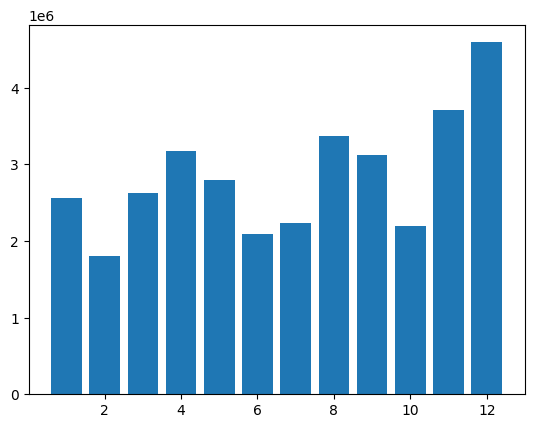

In [8]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,df['sales'])
plt.show()

What city had the highest price of sales

In [57]:
import pandas as pd

months = months_data['Purchase Address']

df = pd.DataFrame(months)

# Define a regular expression to extract the city
city_regex = r',\s*([A-Za-z\s]+),\s*[A-Za-z]{2}\s*\d{5}'

# Use str.extract to create a new 'city' column
df['city'] = df['Purchase Address'].str.extract(city_regex)

#creating a data frame with the cities with their sales
df2 = pd.DataFrame(columns=['city','sales'])
df2['sales'] = pd.to_numeric(months_data['Price Each'], errors='coerce')
df2['city']=df['city']

#now grouping to have each city with the totale sales price
df2 = df2.groupby('city')['sales'].sum().reset_index()

print("the city with the highest price of sales: ")
print(df2.loc[df2['sales'].idxmax()])

the city with the highest price of sales: 
city     San Francisco
sales       8211461.74
Name: 7, dtype: object


What city had the highest number of sales

In [55]:
months = months_data['Purchase Address']

df = pd.DataFrame(months)

# Define a regular expression to extract the city
city_regex = r',\s*([A-Za-z\s]+),\s*[A-Za-z]{2}\s*\d{5}'

# Use str.extract to create a new 'city' column
df['city'] = df['Purchase Address'].str.extract(city_regex)


# Count the occurrences of each city
df = df['city'].value_counts().reset_index()

# Rename the columns for clarity
df.columns = ['city', 'Count']

print("the city with the highest number of sales: ")
print(df.loc[df['Count'].idxmax()])

the city with the highest number of sales: 
city     San Francisco
Count            44732
Name: 0, dtype: object


What time should we display ads

In [54]:

#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],format='%m/%d/%y %H:%M')
#error: invalid string coercion to datetime

data=all_data['Order Date']
df=pd.DataFrame(data)
df['hour'] = all_data['Order Date'].str[9:11]

#now we can see which one is the most commun and choose that hour as the time
#we will add counts value

# Count the occurrences of each city
df = df['hour'].value_counts().reset_index()
df.columns = ['hour', 'Count']

print(df)
print("the time we should display the ads is at: ")
max_hour = df.loc[df['Count'].idxmax()]
print(max_hour)

   hour  Count
0    19  12905
1    12  12587
2    11  12411
3    18  12280
4    20  12228
5    13  12129
6    14  10984
7    10  10944
8    21  10921
9    17  10899
10   16  10384
11   15  10175
12   22   8822
13   09   8748
14   23   6275
15   08   6256
16   07   4011
17   00   3910
18   06   2482
19   01   2350
20   05   1321
21   02   1243
22   04    854
23   03    831
24    e    355
the time we should display the ads is at: 
hour        19
Count    12905
Name: 0, dtype: object
